# CODE TO CONVERT DICOM, PNG TO JPEG AND COMBINE IMAGES IN ONE FOLDER

from PIL import Image
import os
from pathlib import Path

# Define input and output directories
input_dir = [
    r"C:\Users\net pc\Desktop\DATA SCIENCE JOURNEY\Python files\synthetic\KIDNEY TUMOR CONTROL",
    r"C:\Users\net pc\Desktop\DATA SCIENCE JOURNEY\Python files\synthetic\SYNTHETIC BRAIN TUMOR"
]
output_dir = r"C:\Users\net pc\Desktop\DATA SCIENCE JOURNEY\Python files\synthetic\Brain Tumor Classification"

# Create output directory if it does not exist
Path(output_dir).mkdir(parents=True, exist_ok=True)

# Define a function to rename and convert images to JPEG
def convert_and_rename_images(folder_path, prefix):
    # Get a list of all image file paths in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Loop through all image files, convert to JPEG, and rename them
    for i, filename in enumerate(image_files):
        # Open the image and convert to RGB (if it's not already in that mode)
        img = Image.open(os.path.join(folder_path, filename)).convert('RGB')

        # Construct the new file name using the specified prefix and index
        new_filename = f'{prefix}_{i+1}.jpg'

        # Save the image as JPEG
        img.save(os.path.join(output_dir, new_filename), 'JPEG')

# Call the convert_and_rename_images function on each input directory separately
for input_path, prefix in zip(input_dir, ['KIDNEY_TUMOR_CONTROL', 'BRAIN_TUMOR']):
    convert_and_rename_images(input_path, prefix)


In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from pathlib import Path
import os

In [2]:
# Load data
image_dir = Path(r"C:\Users\net pc\Desktop\THESIS PROJECT\New folder")


In [3]:
#Ensure that the path you provided exists. You can check this by using
image_dir = Path(r"C:\Users\net pc\Desktop\THESIS PROJECT\New folder")

if image_dir.exists():
    print("Path exists.")
else:
    print("Path does not exist.")


Path exists.


In [4]:
filepaths = list(image_dir.glob(r'*/*.JPG'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)


In [5]:
image_df

,Filepath,Label
0,C:\Users\net pc\Desktop\THESIS PROJECT\New fol...,brain_tumors.jpg
1,C:\Users\net pc\Desktop\THESIS PROJECT\New fol...,brain_tumors.jpg
2,C:\Users\net pc\Desktop\THESIS PROJECT\New fol...,brain_tumors.jpg
3,C:\Users\net pc\Desktop\THESIS PROJECT\New fol...,brain_tumors.jpg
4,C:\Users\net pc\Desktop\THESIS PROJECT\New fol...,brain_tumors.jpg
...,...,...
39995,C:\Users\net pc\Desktop\THESIS PROJECT\New fol...,kidney_tumors.jpg
39996,C:\Users\net pc\Desktop\THESIS PROJECT\New fol...,kidney_tumors.jpg
39997,C:\Users\net pc\Desktop\THESIS PROJECT\New fol...,kidney_tumors.jpg
39998,C:\Users\net pc\Desktop\THESIS PROJECT\New fol...,kidney_tumors.jpg


In [6]:
train_df, test_df = train_test_split(image_df, train_size=0.80, shuffle=True, random_state=1)

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  horizontal_flip=True,
                                                                  width_shift_range=0.2,
                                                                  height_shift_range=0.2,
                                                                  validation_split=0.2)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [8]:
train_images = train_generator.flow_from_dataframe(dataframe=train_df,
                                                   x_col='Filepath',
                                                   y_col='Label',
                                                   target_size=(64, 64),
                                                   color_mode='rgb',
                                                   class_mode='binary',
                                                   batch_size=32,
                                                   shuffle=True,
                                                   seed=42,
                                                   subset='training')

val_images = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col='Filepath',
                                                 y_col='Label',
                                                 target_size=(64, 64),
                                                 color_mode='rgb',
                                                 class_mode='binary',
                                                 batch_size=32,
                                                 shuffle=True,
                                                 seed=42,
                                                 subset='validation')

test_images = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col='Filepath',
                                                 y_col='Label',
                                                 target_size=(64, 64),
                                                 color_mode='rgb',
                                                 class_mode='binary',
                                                 batch_size=32,
                                                 shuffle=False)

Found 25600 validated image filenames belonging to 2 classes.
Found 6400 validated image filenames belonging to 2 classes.
Found 8000 validated image filenames belonging to 2 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

def create_model(input_shape, num_classes):
    model = Sequential()

    # Mixed-Scale Dense Convolution Layer
    model.add(Conv2D(input_shape=(64,64,3), filters=16, kernel_size=(3, 3), activation="relu"))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Self-Attention Mechanism
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Hierarchical Feature Fusion
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Attention-Based Contextual Information
    model.add(Flatten())
    model.add(Dense(units=64, activation="relu"))
    model.add(Dropout(0.25))
    
    # Additional Fully Connected Layers
    model.add(Dense(units=128, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(units=64, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(units=32, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(units=16, activation="relu"))
    model.add(Dropout(0.25))

    # Output layer
    model.add(Dense(units=1, activation="sigmoid"))

    return model

In [10]:
# Create the model
model = create_model((64,64,3), 1)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)       7

In [12]:
# Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [13]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)

Epoch 1/50


800/800 [==============================] - 144s 179ms/step - loss: 0.3383 - accuracy: 0.8389 - val_loss: 0.0969 - val_accuracy: 0.9619 - lr: 1.0000e-04
Epoch 2/50
800/800 [==============================] - 67s 83ms/step - loss: 0.1003 - accuracy: 0.9700 - val_loss: 0.0600 - val_accuracy: 0.9792 - lr: 1.0000e-04
Epoch 3/50
800/800 [==============================] - 67s 83ms/step - loss: 0.0706 - accuracy: 0.9783 - val_loss: 0.0382 - val_accuracy: 0.9866 - lr: 1.0000e-04
Epoch 4/50
800/800 [==============================] - 67s 83ms/step - loss: 0.0564 - accuracy: 0.9838 - val_loss: 0.0330 - val_accuracy: 0.9873 - lr: 1.0000e-04
Epoch 5/50
800/800 [==============================] - 66s 83ms/step - loss: 0.0451 - accuracy: 0.9864 - val_loss: 0.0288 - val_accuracy: 0.9908 - lr: 1.0000e-04
Epoch 6/50
800/800 [==============================] - 67s 83ms/step - loss: 0.0415 - accuracy: 0.9868 - val_loss: 0.0245 - val_accuracy: 0.9916 - lr: 1.0000e-04
Epoch 7/50
800/800 [==========

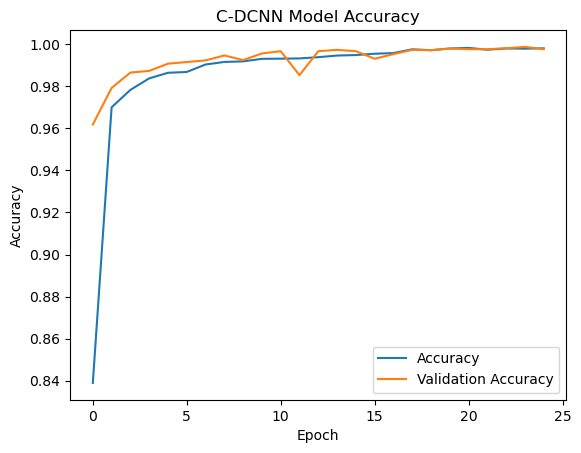

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('C-DCNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy', 'loss', 'Validation Loss'])
plt.show()

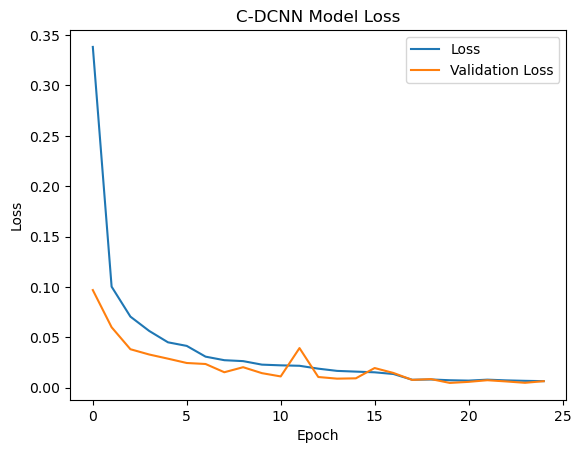

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('C-DCNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [16]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.00244
Test Accuracy: 99.89%


250/250 [==============================] - 11s 42ms/step


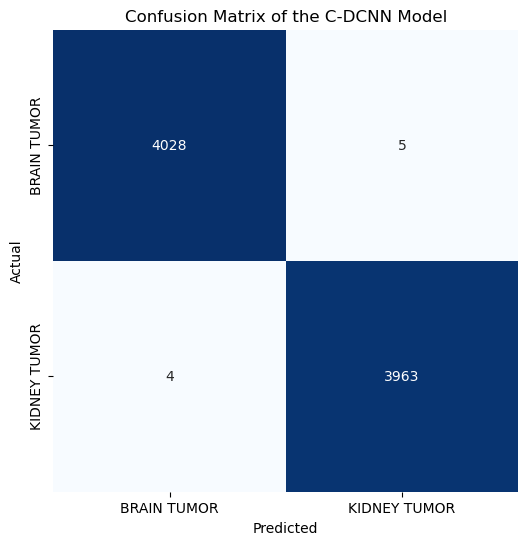

Classification Report:
----------------------
               precision    recall  f1-score   support

 BRAIN TUMOR       1.00      1.00      1.00      4033
KIDNEY TUMOR       1.00      1.00      1.00      3967

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [17]:
predictions = (model.predict(test_images) >= 0.5).astype(int)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["BRAIN TUMOR", "KIDNEY TUMOR"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["BRAIN TUMOR", "KIDNEY TUMOR"])
plt.yticks(ticks=[0.5, 1.5], labels=["BRAIN TUMOR", "KIDNEY TUMOR"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of the C-DCNN Model")
plt.show()

print("Classification Report:\n----------------------\n", clr)

250/250 [==============================] - 11s 44ms/step
AUC ROC: 1.00000


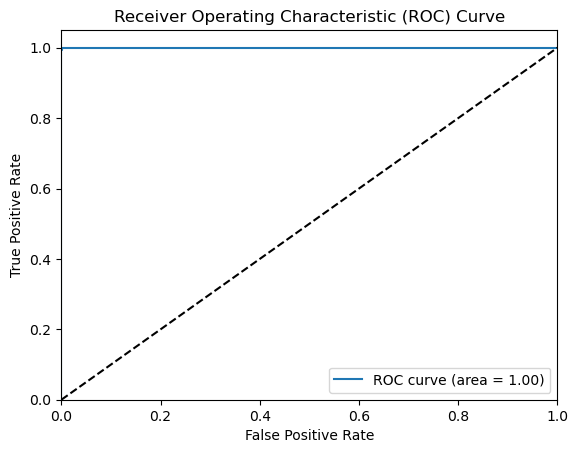

In [18]:
# Obtain predicted probabilities
from sklearn.metrics import roc_auc_score, roc_curve

predicted_probabilities = model.predict(test_images)

# Compute AUC ROC
auc_roc = roc_auc_score(test_images.labels, predicted_probabilities)

print("AUC ROC: {:.5f}".format(auc_roc))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(test_images.labels, predicted_probabilities)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [19]:
# save the model to a file
model.save('C-DCNN Model-BRAIN TUMOR vs KIDNEY TUMOR .h5')

C:\Users\Public\Efendim\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
#from keras.models import load_model

# Load the model
#loaded_model = load_model('C-DCNN Model-BRAIN TUMOR vs KIDNEY TUMOR .h5')

# Now you can use the loaded_model for predictions

In [21]:
#Create a Flask App
#1. Create a New Directory
#import os

# Specify the name of your new directory
#new_directory = 'model_deployment'

# Create the directory if it doesn't exist
#if not os.path.exists(new_directory):
#    os.makedirs(new_directory)

# Move into the new directory
#os.chdir(new_directory)